<a href="https://colab.research.google.com/github/CRKcric/CRKcric/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving population_by_year_2014_2024.csv to population_by_year_2014_2024.csv


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
population=pd.read_csv('population_by_year_2014_2024.csv')
print("Population")
print(population.isnull().sum())
print("\n")
populationmelted = pd.melt(population,
                    id_vars=['Country'],
                    value_vars=[str(year) for year in range(2014, 2025)],
                    var_name='Year',
                    value_name='Population')
populationmelted['Year'] = populationmelted['Year'].astype(int)
populationmelted['Population'] = pd.to_numeric(populationmelted['Population'], errors='coerce')
print("Populationmelted")
print(populationmelted.isnull().sum())
print("\n")

Population
Country    0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
2024       0
dtype: int64


Populationmelted
Country       0
Year          0
Population    0
dtype: int64




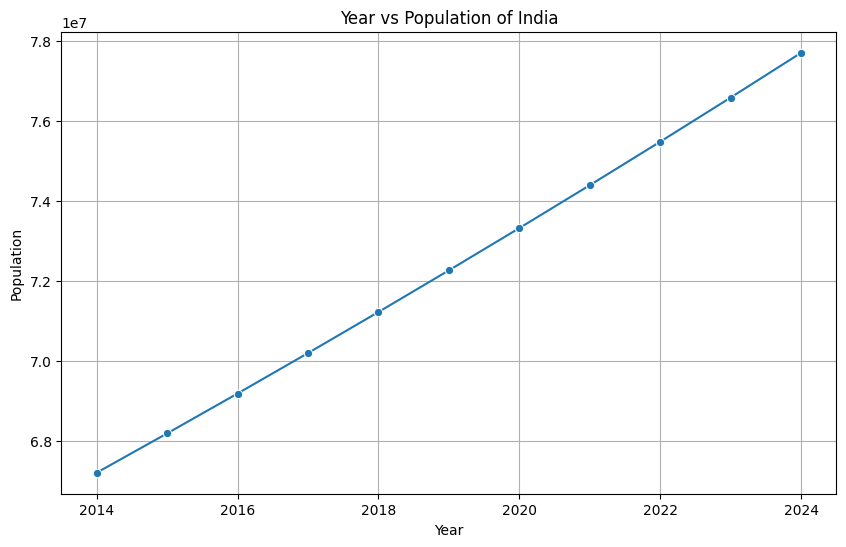

In [ ]:
populationfiltered =populationmelted[populationmelted['Country'] == 'India']
plt.figure(figsize=(10,6))
sns.lineplot(data=populationfiltered ,x='Year',y='Population',marker='o')
plt.title("Year vs Population of India")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.show()

<ipython-input-23-12fee78df33d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avgpopulationperyear,x='Year',y='Population',palette='coolwarm')


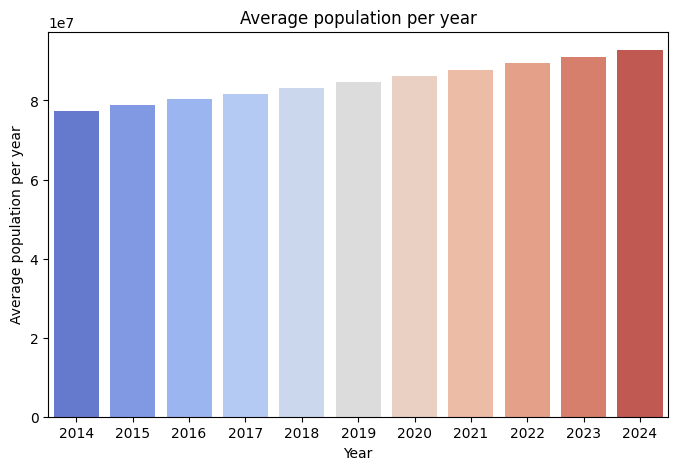

In [ ]:
avgpopulationperyear = populationmelted.groupby('Year')['Population'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avgpopulationperyear,x='Year',y='Population',palette='coolwarm')
plt.title("Average population per year")
plt.xlabel("Year")
plt.ylabel("Average population per year")
plt.show()

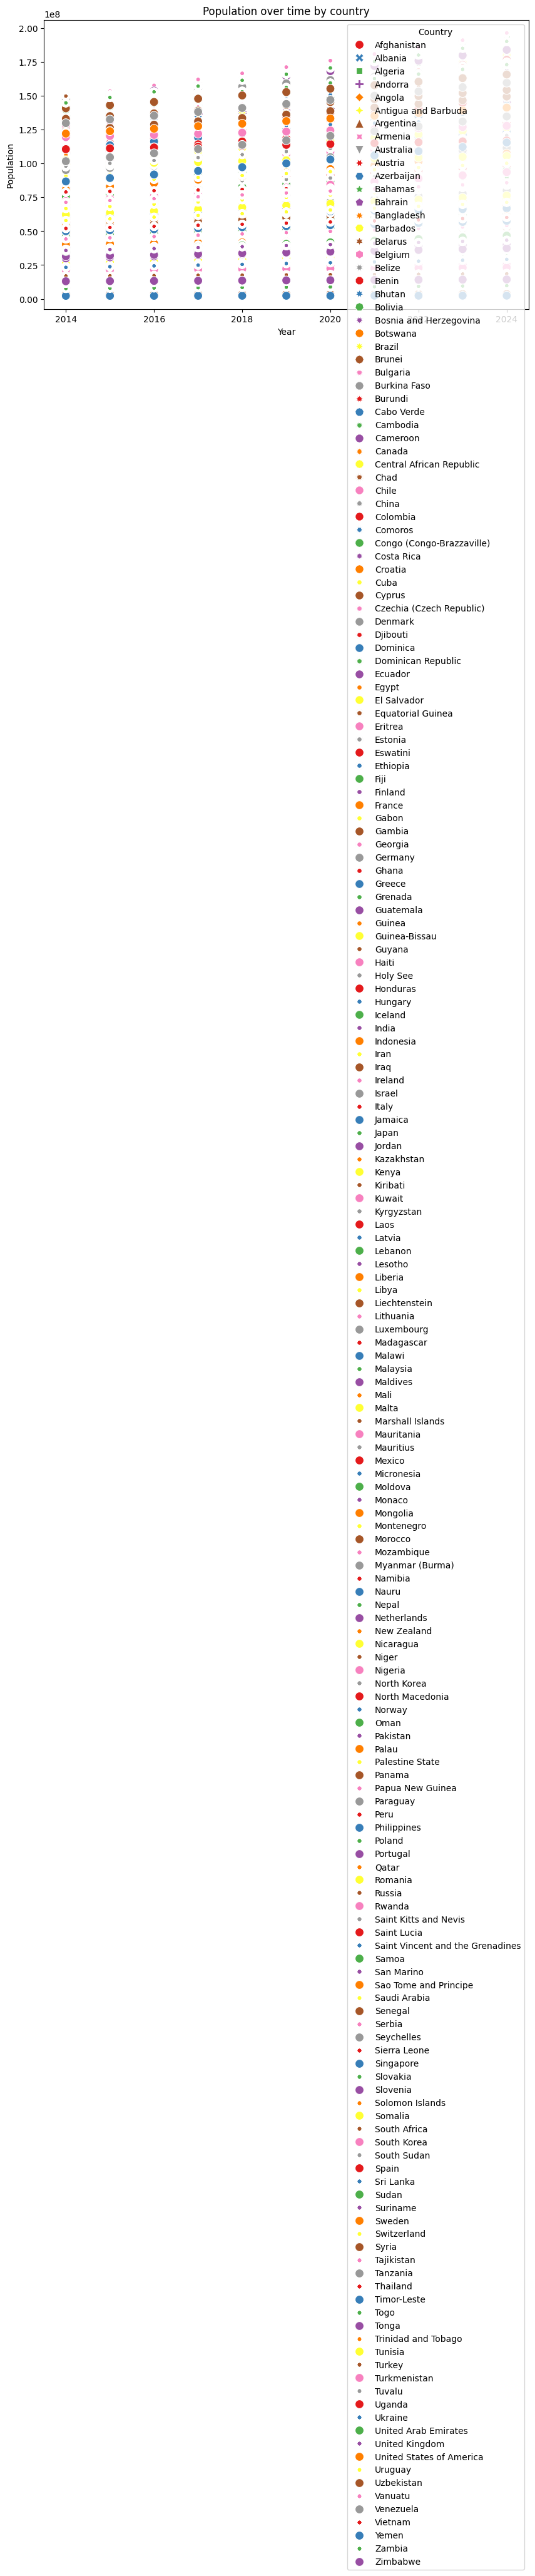

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=populationmelted,x='Year',y='Population',hue='Country',style='Country',palette='Set1',s=100)
plt.title("Population over time by country")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title='Country')
plt.show()

<ipython-input-31-5421e76705a0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=populationmelted,x='Population',palette='skyblue',bins=10)


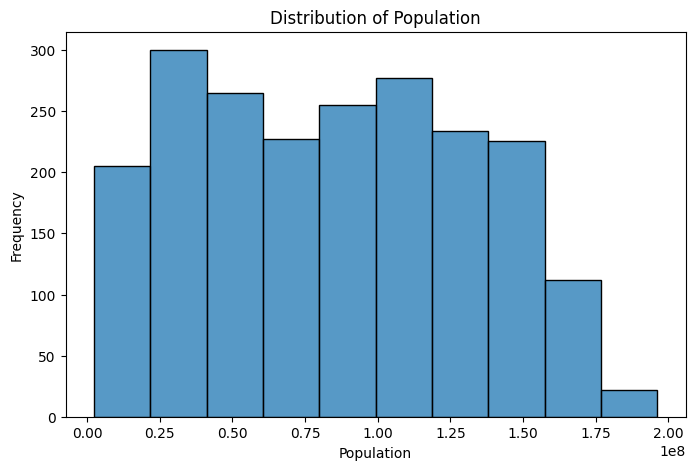

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=populationmelted,x='Population',palette='skyblue',bins=10)
plt.title("Distribution of Population")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

                Year  Population
Year        1.000000    0.101548
Population  0.101548    1.000000


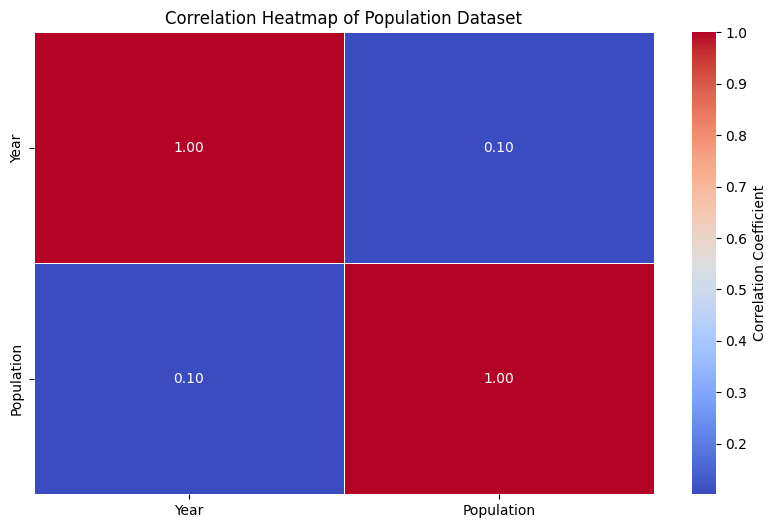

In [53]:
populationmelted.set_index('Country', inplace=True)
correlation_matrix = populationmelted.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'}, linewidths=0.5)
plt.title("Correlation Heatmap of Population Dataset")
plt.show()